In [2]:
import pandas as pd
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns  
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv("Layout1.csv")
df.head()

,No_Occupant,Met,Clo,CO2_Outdoor,CO2_Indoor,Outdoor_Temp,Indoor_Temp,Outdoor_Humidity,Indoor_Humidity,Energy_Consumption_Light,Energy_Consumption_HVAC,Energy_Consumption_Others,Total_Energy_Consumption
0,3,1.0,0.8,399.457034,1240.8769,30.374280,21.972234,89.9870,65.9872,0.000000,0.000000,0.000000,0.000000
1,4,0.9,0.6,414.111372,1354.8900,29.647268,18.383509,89.9654,65.9826,0.133301,2.952736,0.066271,3.152308
2,3,0.9,1.0,427.500606,1356.9000,32.290966,21.134369,89.6579,65.9780,0.121486,2.918206,0.057519,3.097212
3,4,0.8,1.0,426.535510,1456.9800,29.243687,21.967405,89.3504,65.9734,0.154176,1.452490,0.054401,1.661067
4,3,1.0,0.9,425.570414,1345.0900,30.309128,23.240612,89.0429,65.9688,0.074840,2.305990,0.054861,2.435691


In [4]:
 #displaying categories of values for each column with its count
col_names = list(df.columns.values) #update columns names

for i in col_names:
    print(df[i].value_counts(dropna=False))

No_Occupant
3    575
4    381
2    233
5    219
1    202
Name: count, dtype: int64
Met
0.80    171
0.95    126
0.98    123
0.70    120
0.96     95
1.10     92
0.91     82
0.99     79
0.90     79
0.87     76
1.11     74
0.85     69
0.89     58
0.97     50
0.83     49
0.60     48
1.12     48
1.21     39
0.86     39
1.00     31
0.84     20
1.30     19
1.20     14
0.88      4
1.13      2
1.22      1
1.33      1
0.82      1
Name: count, dtype: int64
Clo
0.656    185
0.887     87
0.832     80
0.821     79
0.843     79
        ... 
0.634      1
0.601      1
0.612      1
0.645      1
0.623      1
Name: count, Length: 63, dtype: int64
CO2_Outdoor
445.444032    79
445.715816    78
445.172248    78
444.628679    76
444.900464    75
              ..
445.254658     1
446.259384     1
445.987600     1
442.726190     1
439.226302     1
Name: count, Length: 95, dtype: int64
CO2_Indoor
1466.7839    79
1458.2292    78
1475.3386    78
1492.4480    76
1483.8933    75
             ..
1432.5651     1
1441.1

<Axes: >

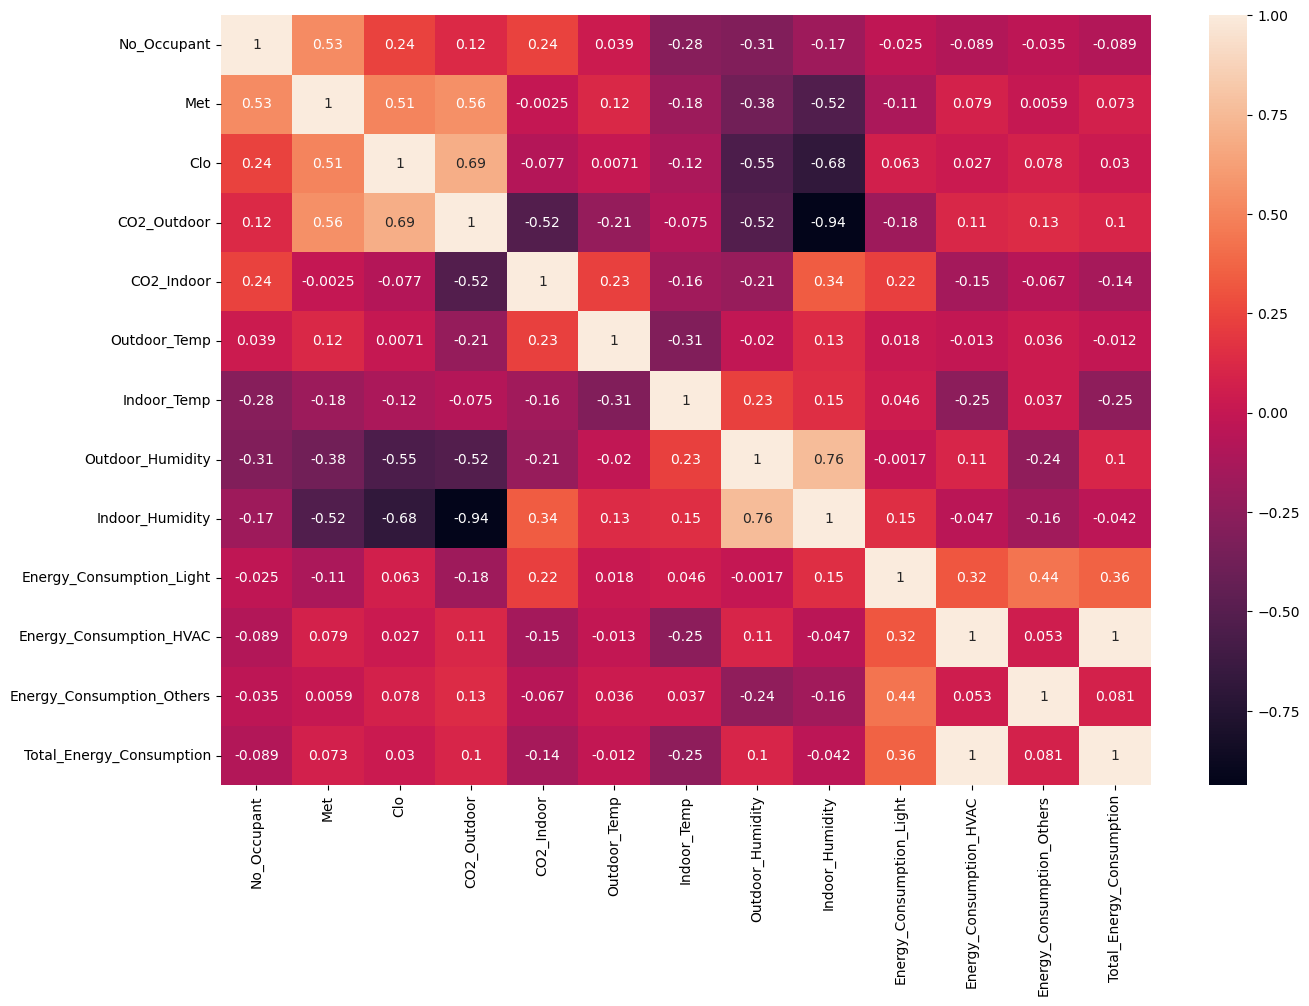

In [5]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [6]:
inputs = df.drop(['Energy_Consumption_Light','Energy_Consumption_HVAC', 'Energy_Consumption_Others', 'Total_Energy_Consumption'], axis=1)

In [7]:
target = df['Total_Energy_Consumption']

In [8]:
inputs

,No_Occupant,Met,Clo,CO2_Outdoor,CO2_Indoor,Outdoor_Temp,Indoor_Temp,Outdoor_Humidity,Indoor_Humidity
0,3,1.00,0.800,399.457034,1240.8769,30.374280,21.972234,89.98700,65.987200
1,4,0.90,0.600,414.111372,1354.8900,29.647268,18.383509,89.96540,65.982600
2,3,0.90,1.000,427.500606,1356.9000,32.290966,21.134369,89.65790,65.978000
3,4,0.80,1.000,426.535510,1456.9800,29.243687,21.967405,89.35040,65.973400
4,3,1.00,0.900,425.570414,1345.0900,30.309128,23.240612,89.04290,65.968800
...,...,...,...,...,...,...,...,...,...
1605,3,0.98,0.568,425.160138,1421.7550,31.258981,21.849982,84.91180,61.949350
1606,3,0.96,0.579,426.164864,1407.4120,33.412066,22.078639,85.20260,61.667175
1607,1,0.85,0.656,438.410500,1328.4249,32.276028,23.272368,90.54236,59.708340
1608,1,0.85,0.656,437.625400,1321.9796,32.024826,20.695245,90.37248,59.949625


In [9]:
target

0       0.000000
1       3.152308
2       3.097212
3       1.661067
4       2.435691
          ...   
1605    2.760807
1606    2.651721
1607    1.901029
1608    2.833040
1609    4.493445
Name: Total_Energy_Consumption, Length: 1610, dtype: float64

<Axes: >

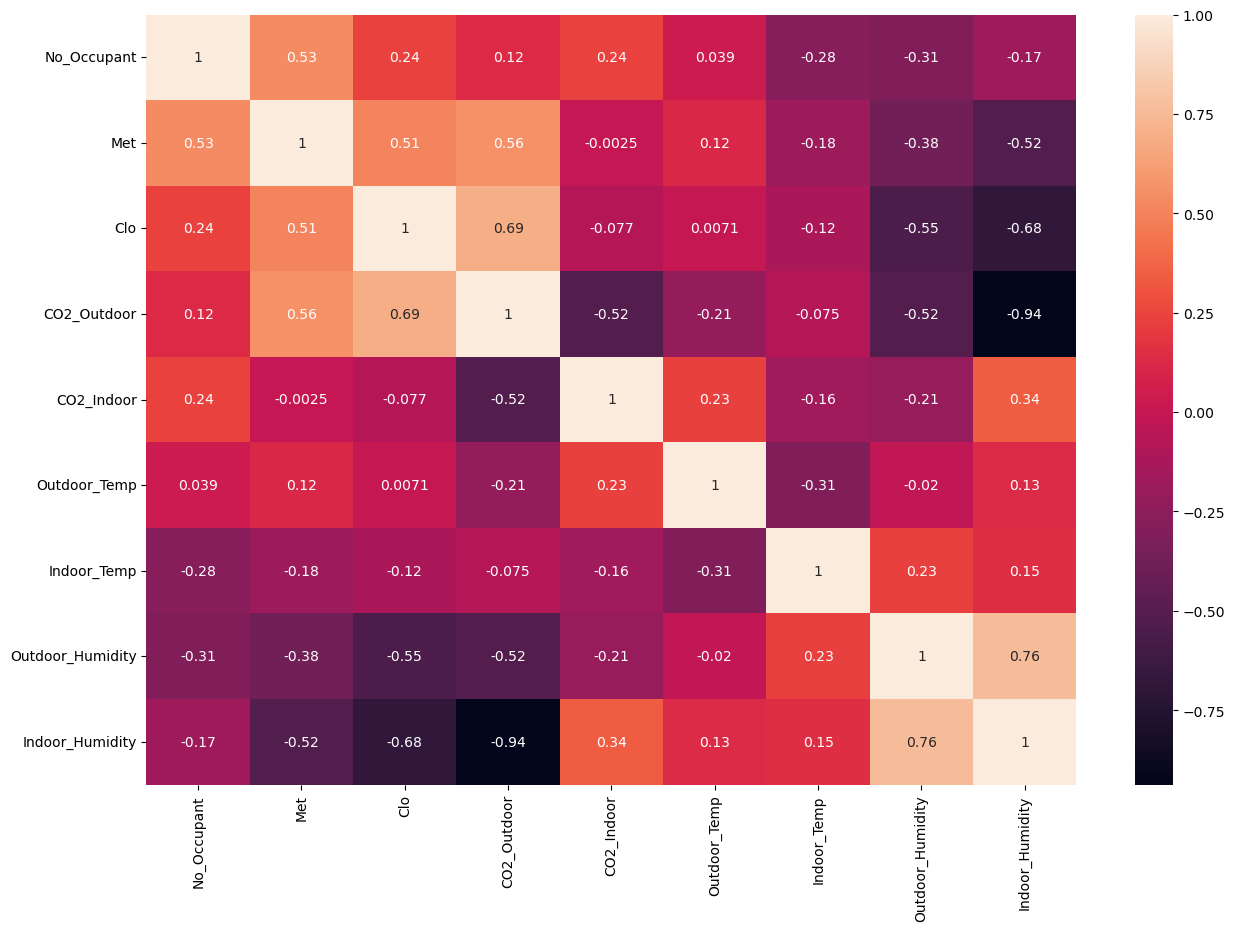

In [10]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(inputs.corr(),annot=True)

In [11]:
from sklearn.model_selection import train_test_split
X = inputs  
y = target

In [12]:
df['Total_Energy_Consumption'].value_counts()

Total_Energy_Consumption
2.696866    79
2.189607    78
2.525352    78
2.953962    76
1.982639    75
            ..
3.980170     1
4.439695     1
3.883525     1
2.455324     1
2.659507     1
Name: count, Length: 95, dtype: int64

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =42) # 75 - 25 split   (test_size=0.20)

In [16]:
DT = DecisionTreeRegressor(max_depth =7, max_features = 3, random_state = 42)

In [17]:
DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, max_features=3, random_state=42)

In [18]:
DT.score(X_train, y_train)

0.8831993699626141

In [19]:
y_predict = DT.predict(X_test)

result = DT.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.8350534913740675


In [20]:
y_predict = DT.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.05
RMSE: 0.23


In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [22]:
r2 = r2_score(y_test, y_predict)
print('\nR2 =', r2,) 


R2 = 0.8350534913740675


Text(0, 0.5, 'Features')

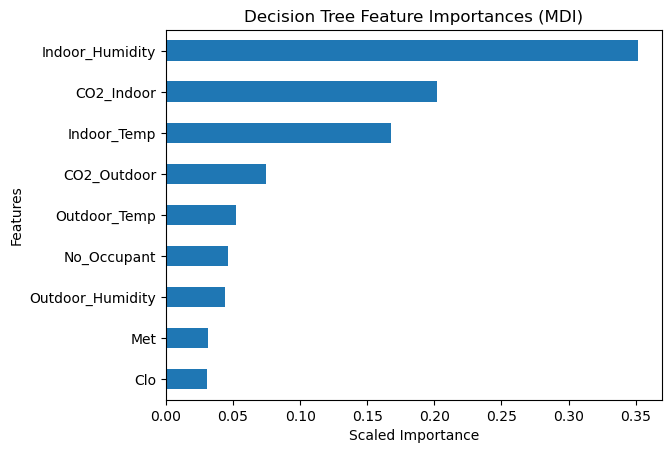

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
feat_importances = pd.Series(DT.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')
plt.title('Decision Tree Feature Importances (MDI)')
plt.xlabel('Scaled Importance')
plt.ylabel('Features')

In [24]:
# Combine feature names and importances
feature_importances_list = list(zip(feat_importances.index, feat_importances.values))

# Print the combined feature names and importances
for feature, importance in feature_importances_list:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Clo, Importance: 0.030363780796043707
Feature: Met, Importance: 0.03146781727327665
Feature: Outdoor_Humidity, Importance: 0.044278540400807365
Feature: No_Occupant, Importance: 0.04592072534972739
Feature: Outdoor_Temp, Importance: 0.051828507333540996
Feature: CO2_Outdoor, Importance: 0.07465644178795945
Feature: Indoor_Temp, Importance: 0.16730155685962
Feature: CO2_Indoor, Importance: 0.20214798288799768
Feature: Indoor_Humidity, Importance: 0.35203464731102674


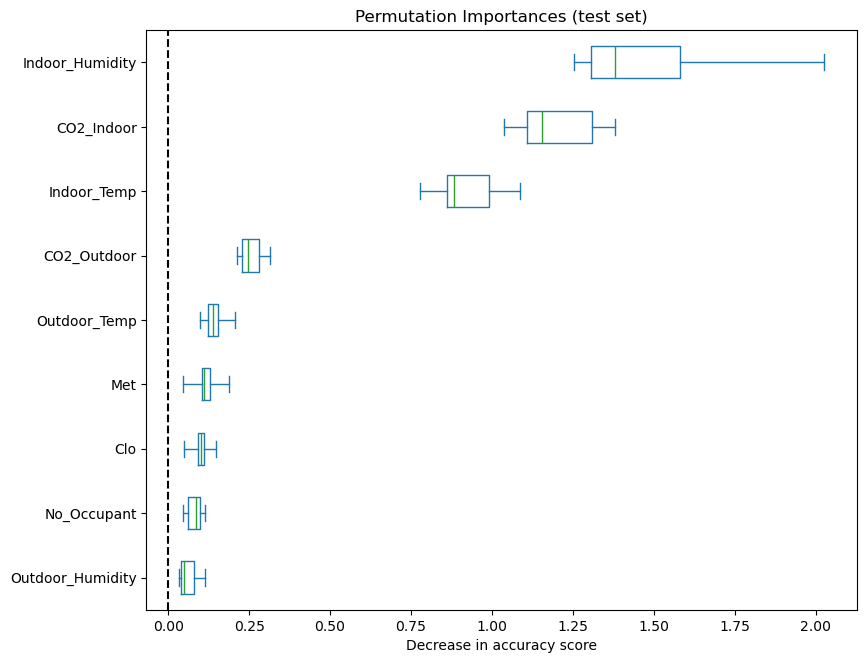

<Figure size 2500x1500 with 0 Axes>

In [25]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    DT, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

In [26]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

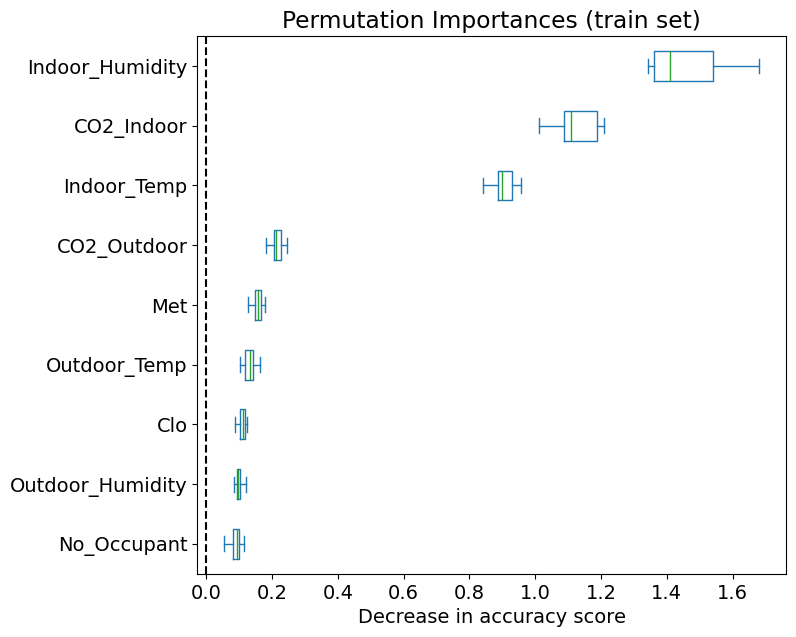

<Figure size 2500x1500 with 0 Axes>

In [27]:
result = permutation_importance(
    DT, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

In [28]:
import numpy as np
import pandas as pd

In [29]:
import shap
explainer = shap.TreeExplainer(DT)
shap_values = explainer.shap_values(X_test)

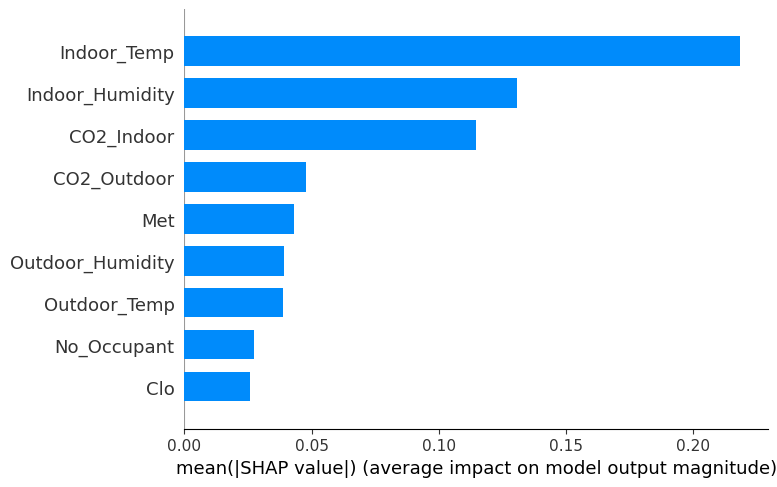

In [30]:
import shap
shap.summary_plot(shap_values, X_test, plot_type="bar",)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Sensitivity Analysis

CO2_Indoor: 12.101835510022841
Indoor_Humidity: 2.963006492283505
Indoor_Temp: 1.0228177665163944
CO2_Outdoor: 0.9251535485668254
Outdoor_Temp: 0.3733539438094693
Outdoor_Humidity: 0.26864838136864755
Met: 0.18587698841747347
Clo: 0.1511805611743482
No_Occupant: 0.07256683843971234


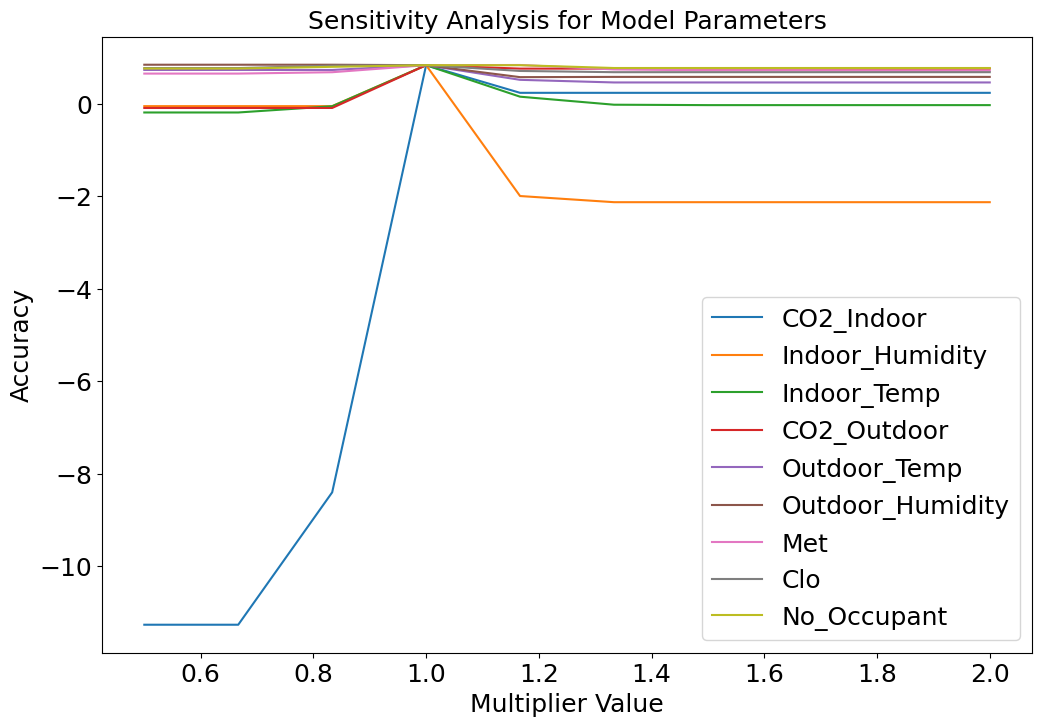

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters to analyze
parameters = ['No_Occupant', 'Met', 'Clo', 'CO2_Outdoor', 'CO2_Indoor', 'Outdoor_Temp', 'Indoor_Temp', 'Outdoor_Humidity', 'Indoor_Humidity']

# Initialize a dictionary to store the sensitivity coefficients
sensitivity_coefficients = {}

# Perform sensitivity analysis for each parameter
for parameter in parameters:
    results = []
    for value in np.linspace(0.5, 2.0, 10):  # Vary the parameter value from 0.5 to 2.0
        X_test_modified = X_test.copy()  # Create a copy of the original test data
        X_test_modified[parameter] = X_test_modified[parameter] * value  # Modify the parameter value

        # Predict using the modified data
        y_predict_modified = DT.predict(X_test_modified)

        # Evaluate the model with the modified parameter
        result = DT.score(X_test_modified, y_test)
        results.append(result)

    # Calculate sensitivity coefficient as the range of model performance
    sensitivity_coefficient = max(results) - min(results)
    sensitivity_coefficients[parameter] = sensitivity_coefficient

# Sort parameters by sensitivity coefficient in descending order
sorted_parameters = sorted(sensitivity_coefficients, key=sensitivity_coefficients.get, reverse=True)

# Print the sensitivity coefficients for each parameter
for parameter in sorted_parameters:
    print(f'{parameter}: {sensitivity_coefficients[parameter]}')

# Plot all sensitivity analyses in a single frame
plt.figure(figsize=(12, 8))
for parameter in sorted_parameters:
    results = []
    for value in np.linspace(0.5, 2.0, 10):  # Vary the parameter value from 0.5 to 2.0
        X_test_modified = X_test.copy()  # Create a copy of the original test data
        X_test_modified[parameter] = X_test_modified[parameter] * value  # Modify the parameter value

        # Predict using the modified data
        y_predict_modified = DT.predict(X_test_modified)

        # Evaluate the model with the modified parameter
        result = DT.score(X_test_modified, y_test)
        results.append(result)

    plt.plot(np.linspace(0.5, 2.0, 10), results, label=parameter)

plt.xlabel('Multiplier Value', fontsize=18)  # Adjust font size for x-axis label
plt.ylabel('Accuracy', fontsize=18)  # Adjust font size for y-axis label
plt.title('Sensitivity Analysis for Model Parameters', fontsize=18)  # Adjust font size for title
plt.legend(fontsize=18) 
plt.tick_params(axis='both', which='major', labelsize=18)  # Adjust font size for tick labels
plt.show()

# https://stackoverflow.com/questions/73523144/cross-validation-for-random-forest-regression

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
      
param_grid = {
    "criterion": ('squared_error', 'absolute_error', 'poisson'),  # ✅ Fixed
    "splitter": ("best", "random"), 
    "max_depth": list(range(4, 10)), 
    "min_samples_split": [2, 3, 4], 
    "min_samples_leaf": list(range(1, 10)), 
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=0), param_grid=param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42))

grid_search.fit(X_train, y_train)

C:\Users\PC\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ('squared_error', 'absolute_error',
                                       'poisson'),
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')})

In [34]:
grid_search.best_score_

0.8935793124486683

In [35]:
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [36]:
grid_search.score(X_test,y_test)

0.8140371307846301

In [37]:
DT = DecisionTreeRegressor(criterion = grid_search.best_params_['criterion'],
                           max_depth = grid_search.best_params_['max_depth'],
                          min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                           min_samples_split = grid_search.best_params_['min_samples_split'],
                           random_state = 0)
    
DT.fit(X_train, y_train)

n_scores = cross_val_score(DT, X_train, y_train,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42)).mean()

prediction = DT.predict(X_test)

In [38]:
n_scores = cross_val_score(grid_search, X_train, y_train,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42)).mean()
grid_search.predict(X_test)

array([1.74814751, 2.83303964, 2.9539618 , 2.65474218, 3.0573923 ,
       2.1723602 , 2.9539618 , 2.65474218, 1.98263949, 2.1723602 ,
       3.11274921, 2.55911942, 2.48120236, 1.98263949, 2.35348321,
       4.49344533, 2.84861899, 1.5589794 , 2.04968875, 1.9010292 ,
       2.48120236, 2.26494228, 4.49344533, 1.74814751, 2.9539618 ,
       3.10116092, 2.49653431, 2.1723602 , 3.11274921, 2.04968875,
       2.49653431, 2.65474218, 2.26494228, 3.11274921, 3.11274921,
       3.58715573, 2.04968875, 2.55911942, 2.83303964, 2.04968875,
       2.9120594 , 2.65474218, 2.26494228, 1.5589794 , 2.65474218,
       2.87377936, 2.49653431, 2.65474218, 2.49653431, 2.1723602 ,
       2.35348321, 2.84861899, 2.48120236, 3.11274921, 1.98263949,
       1.9010292 , 2.65474218, 2.26494228, 2.48120236, 2.48120236,
       2.49653431, 2.48120236, 2.49653431, 2.16804199, 1.9010292 ,
       2.09080879, 1.98263949, 2.9539618 , 2.49653431, 2.1723602 ,
       2.65474218, 1.98263949, 2.48120236, 1.86184529, 1.81867